In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.svm import SVC

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
def gen_lin_separable_overlap_data(size_of_each_class, test_size_of_each_class):
    # generate training data in the 2-d case
    mean1 = np.array([0, 2])
    mean2 = np.array([2, 0])
    cov = np.array([[1.5, 1.0], [1.0, 1.5]])
    X1 = np.random.multivariate_normal(mean1, cov, size_of_each_class + test_size_of_each_class)
    y1 = np.ones(len(X1))
    X2 = np.random.multivariate_normal(mean2, cov, size_of_each_class + test_size_of_each_class)
    y2 = np.ones(len(X2)) * -1
    X1_train = X1[:size_of_each_class]
    y1_train = y1[:size_of_each_class]
    X2_train = X2[:size_of_each_class]
    y2_train = y2[:size_of_each_class]
    X_train = np.vstack((X1_train, X2_train))
    y_train = np.hstack((y1_train, y2_train))
    X1_test = X1[size_of_each_class:]
    y1_test = y1[size_of_each_class:]
    X2_test = X2[size_of_each_class:]
    y2_test = y2[size_of_each_class:]
    X_test = np.vstack((X1_test, X2_test))
    y_test = np.hstack((y1_test, y2_test))
    return X_train, y_train, X_test, y_test

In [83]:
import pandas as pd
# url with dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
# download the file


In [84]:
cols = ["No. times preg", "glucose concentration","blood pressure","skin thickness","serum insulin", "BMI","pedigree","Age","label"]
df = pd.read_csv(url,names=cols)

In [85]:
df.head()

,No. times preg,glucose concentration,blood pressure,skin thickness,serum insulin,BMI,pedigree,Age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [86]:
df_new = df[cols[:-1]]

In [87]:
df_norm = (df_new - df_new.mean()) / (df_new.max() - df_new.min())

In [88]:
X_ori = df_norm.as_matrix()[:,:8]
y_ori = df.as_matrix()[:,8]

In [91]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ori, y_ori)

In [92]:
X_train=X_train[:]
y_train=y_train[:]

In [93]:
X_train

array([[ 0.12676164,  0.13620839,  0.02372567, ...,  0.02395562,
         0.06623557,  0.27931858],
       [ 0.00911458, -0.05474639, -0.02545466, ..., -0.0013797 ,
        -0.00037417, -0.07068142],
       [ 0.00911458,  0.10103251,  0.04011911, ..., -0.06546316,
        -0.09729987,  0.11265191],
       ..., 
       [-0.167356  , -0.13012327, -0.07463499, ..., -0.12060474,
        -0.09046811, -0.18734809],
       [-0.10853248,  0.10103251, -0.09102843, ..., -0.09825005,
         0.09697852, -0.15401476],
       [-0.167356  , -0.11002277, -0.09102843, ..., -0.09825005,
         0.03378467, -0.20401476]])

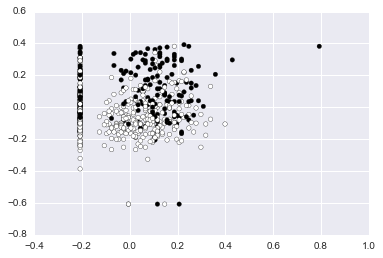

In [94]:
plt.scatter(X_train[:,3],X_train[:,1],c=y_train)

### Starting With Incremental SVM 

In [95]:
train = np.column_stack((X_train, y_train))
test = np.column_stack((X_test, y_test))

In [96]:
## Shuffling Train
np.random.shuffle(train)

In [97]:
split_train = np.split(train, 4)

In [98]:
X_test, y_test = test[:,:-1], test[:,-1]

In [99]:
np.array(split_train).shape, X_train.shape

((4, 144, 9), (576, 8))

In [100]:
## First chunk of data
X1_train, y1_train = split_train[0][:,:-1], split_train[0][:,-1]

In [101]:
## Train first SVM on first chunk of data
svm = SVC(kernel='rbf', C=1, probability=True)
clf = svm.fit(X1_train,y1_train)

In [102]:
# w = clf.coef_[0]
# a = -w[0] / w[1]
# xx = np.linspace(-3, 8)
# yy = a * xx - (clf.intercept_[0]) / w[1]

In [103]:
# margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
# yy_down = yy + a * margin
# yy_up = yy - a * margin

In [104]:
# plt.figure(figsize=(12,8))
# plt.plot(xx, yy, 'k-')
# plt.plot(xx, yy_down, 'k--')
# plt.plot(xx, yy_up, 'k--')
# plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
#             facecolors='none', zorder=10)
# plt.scatter(X1_train[:, 0], X1_train[:, 1], c=y1_train, zorder=10, cmap=plt.cm.Paired)
# plt.xlim([-4,6])
# plt.ylim([-4,6])
# plt.title("SVM on Training Chunk 1 Data")

In [105]:
#clf.predict(X_train)

In [118]:
## Incremental For loop
count=0
#del array_of_svms
array_of_svms= []
array_of_svms.append(clf)
threshold_svm = 0.4
for ex in split_train[1:5]:
    predicted_values = np.array([])
    X, y = ex[:,:-1], ex[:,-1]
    inc_svm_predicted_proba = np.zeros((X.shape[0],2))
    for svm_classifier in array_of_svms:
        #print("Length")
        #print(len(array_of_svms))
        inc_svm_predicted_proba += svm_classifier.predict_proba(X)
        #print(0.5*svm_classifier.predict_proba(X))
        #print(svm_classifier.predict_proba(X))
        #print(count)
        #count+=1
    #print(inc_svm_predicted_proba)
    inc_svm_predicted_proba /= len(array_of_svms)
    #print(inc_svm_predicted_proba[:10])
    for x in inc_svm_predicted_proba:
        temp = np.where(x == max(x))[0][0]
        #print(x)
        #if (x[1] >= threshold_svm):
        #    temp = 1
        #else:
        #    temp=0
        predicted_values = np.append(predicted_values, temp)
        #predicted_values.append(temp)
        #print(temp)
    #print(predicted_values[:10])
    #predicted_values = np.array(predicted_values)
    predicted_values[predicted_values == -1] = 0
    y[y==-1]=0
    #print(predicted_values)
    #print(y)
    XOR_of_predicted_actual_y = np.logical_xor(predicted_values, y).astype(int)
    index_of_misclassified_values = np.where(XOR_of_predicted_actual_y==1)
    #print(index_of_misclassified_values)
    X_misclf = X[index_of_misclassified_values]
    y_misclf = y[index_of_misclassified_values]
    print("No. of misclassified: " + str(len(y_misclf)))
    #print(y_misclf[:10])
    #print(confusion_matrix(y_misclf, array_of_svms[count].predict(X_misclf)))
    if ((sum(y_misclf) == 0) or sum(y_misclf) == len(y_misclf)):
        print("All misclassified are of same class..")
        #print(y_misclf[:10])
        continue
    #print(X_misclf)
    #print(y_misclf)
    svm = SVC(kernel='linear', C=1, probability=True)
    clf_new = svm.fit(X_misclf,y_misclf)
    array_of_svms.append(clf_new)
    del X_misclf
    del y_misclf
    del inc_svm_predicted_proba
    del predicted_values
    del XOR_of_predicted_actual_y
    del index_of_misclassified_values
    del X
    del y

No. of misclassified: 33
No. of misclassified: 86
No. of misclassified: 30


In [119]:
#del array_of_svms
for ex in split_train[1:5]:
    for svm in array_of_svms:
        predicted_values = np.array([])
        X, y = ex[:,:-1], ex[:,-1]
        print(svm.predict(X_test))
    #print(clf.predict_proba(X))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 

In [120]:
len(array_of_svms)

4

In [121]:
for svm in array_of_svms:
    print(confusion_matrix(y_test,svm.predict(X_test)))

[[134   0]
 [ 58   0]]
[[  0 134]
 [  0  58]]
[[132   2]
 [ 50   8]]
[[  0 134]
 [  0  58]]


In [82]:
from sklearn.metrics import accuracy_score
for svm in array_of_svms:
    print(accuracy_score(y_test,svm.predict(X_test)))

0.682291666667
0.317708333333
0.734375
0.286458333333
0.6875


In [75]:
len(array_of_svms)

8

In [67]:
proba = clf.predict_proba(X[:10])

In [69]:
predicted = []
for x in proba:
    predicted.append(np.where(x==max(x))[0][0])
    print(np.where(x==max(x))[0][0])

0
1
0
0
0
0
0
1
0
1


In [36]:
predicted

[0, 1, 0, 0, 0, 0, 0, 1, 0, 1]

In [37]:
inc_svm_predicted_proba = np.zeros((X.shape[0],2))

In [38]:
x = np.array([])

In [39]:
x=np.append(x, [2])

In [40]:
x=np.append(x, [3])